### Original question: Has the network latency gone up since we switched internet service providers?

- Null hypothesis: There is no increase in latency after we switched ISPs
- Alternative hypothesis: There is an increase in latency after we switched ISPs

- True positive: An increase in latency
- True negative: No increase in latency
- Type1 Error: We determine that there is an increase, but no change has occured
- Type2 Error: We determine there isn't an increase when there is

## Original question: Is the website redesign any good?

- Null hypothesis: The site redesign hasn't led to an increase in clicks
- Alternative hypothesis: The site redesign has led to an increase in clicks

- True positive: An increase in clicks post_design
- True negative: No increase in clicks post_design
- Type1 Error: We determine that there is an increase, but no change has occured
- Type2 Error: We determine there isn't an increase when there is

## Original question: Is our television ad driving more sales?

- Null hypothesis: Our TV ad is not increasing sales
- Alternative hypothesis: Our TV ad is increasing sales

- True positive: An increase in sales post-TV ad
- True negative: No increase in sales post-TV ad
- Type1 Error: We determine that there is an increase, but no change has occured
- Type2 Error: We determine there isn't an increase when there is

In [1]:
from pydataset import data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

## 1
- Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices.  
- A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. 
- A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. 
- Use a .05 level of significance.

In [39]:
# stating my null, alt, and confidence level
null_hypothesis = "there is no difference in the average time it takes the two offices to sell a home"
alt_hypothesis = "the average time to sell a home is different for the two offices"
confidence_level = 0.95
a = 1 - confidence_level

# setting up my variables
mean1 = 90
std1 = 15
nobs1 = 40

mean2 = 100
std2 = 20
nobs2 = 50

t, p = stats.ttest_ind_from_stats(mean1, std1, nobs1, mean2, std2, nobs2)
t, p

(-2.6252287036468456, 0.01020985244923939)

In [42]:
# using the setup for a two_sample two_tailed test

if p < a:
    print("We reject the null hypothesis that", null_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that the average time for selling homes is different")

We reject the null hypothesis that there is no difference in the average time it takes the two offices to sell a home


## 2
- Load the mpg dataset and use it to answer the following questions:

- Is there a difference in fuel-efficiency in cars from 2008 vs 1999?
- Are compact cars more fuel-efficient than the average car?
- Do manual cars get better gas mileage than automatic cars?

In [6]:
# Loading the dataset

df = data("mpg")
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [19]:
# Question 1: Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

# Assigning variables
is_1999 = df[df.year == 1999]
is_2008 = df[df.year == 2008]

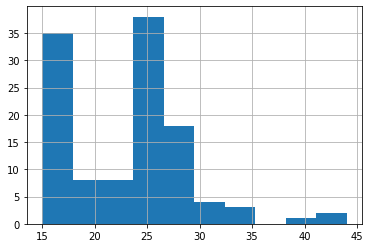

In [20]:
# I chose hwy mileage as my indicator of fuel efficiency

is_1999.hwy.hist()

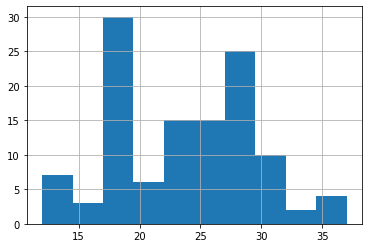

In [21]:
is_2008.hwy.hist()

In [22]:
# setting my confidence level
confidence_level = .95
a = 1 - confidence_level

# ttest_ind for two-sample t-tests
t, p = stats.ttest_ind(is_1999.hwy, is_2008.hwy)
t, p

(-0.03286431672888292, 0.9738110448529322)

In [23]:
# using the setup for a two_sample two_tailed test

if p < a:
    print("We reject the null hypothesis that there is no difference in fuel-efficiency in cars from 2008 vs 1999")
else:
    print("We fail to reject the null hypothesis")
    print("Not enough evidence to support the claim that fuel-efficiency levels are different")

We fail to reject the null hypothesis
Not enough evidence to support the claim that fuel-efficiency levels are different


In [66]:
# Question 2: Are compact cars more fuel-efficient than the average car?
# setting up my null, alt and confidence level

null = "There is no difference in mpg between compact cars and the average car"
alt_hypothesis = "Compact cars have greater mpg than the average car"
confidence_level = .95
a = 1 - confidence_level


In [69]:
def compact(x):
    if x == "compact":
        return 1
    else:
        return 0

In [70]:
df["is_compact"] = df['class'].apply(compact)
df.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency,is_compact
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,11,1
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,8,1
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,11,1
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,9,1
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,10,1


In [71]:
compact = df[df.is_compact == 1]
avg_car = df[df.is_compact == 0]

In [72]:
# getting my t & p

t, p = stats.ttest_ind(compact.hwy, avg_car.hwy)
t, p

(6.844017913682101, 6.802262127570768e-11)

In [73]:
# running my one-tailed test

if (p/2) < a and t > 0:
    print("We reject the null hypothesis")
else:
    print("We fail to reject the null hypothesis")
    print("We don't have enough evidence to support the claim that", alt_hypothesis)

We reject the null hypothesis


In [80]:
# Question 3: Do manual cars get better gas mileage than automatic cars?

# setting up my null and alt
null = "There is no difference in gas mileage between manual cars and automatic cars"
alt_hypothesis = "Manual cars have greater gas mileage than automatic cars"

# setting up my confidence levels
confidence_level = .95
a = 1 - confidence_level

In [75]:
manual = df[df.trans.str[0] == 'm']
automatic = df[df.trans.str[0] == 'a']

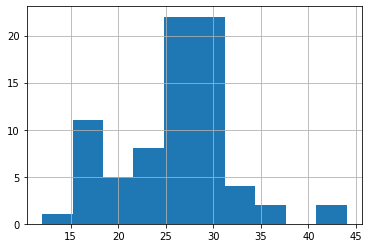

In [76]:
manual.hwy.hist()

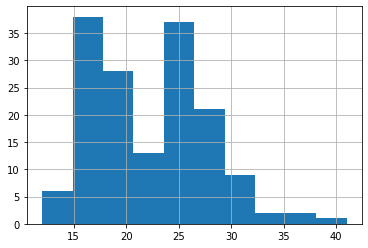

In [77]:
automatic.hwy.hist()

In [78]:
t, p = stats.ttest_ind(manual.hwy, automatic.hwy)
t, p

(4.368349972819688, 1.888044765552951e-05)

In [81]:
if (p/2) < a and t > 0:
    print("We reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars")
else:
    print("We fail to reject the null hypothesis")
    print("we don't have enough evidence to support the claim that", alt_hypothesis)

We reject the null hypothesis that there is no difference in gas mileage between manual and automatic cars
